In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks")

In [2]:
GTC_DATA_DIR = "/gws/nopw/j04/ai4er/users/pn341/earthquake-predictability/data/gtc_quakes_data"
LABQUAKES_DATA_DIR = f"{GTC_DATA_DIR}/labquakes"
MARONE_DATA_DIR = f"{LABQUAKES_DATA_DIR}/Marone"

In [3]:
p4581_FILE_PATH = f"{MARONE_DATA_DIR}/p4581/p4581.txt"
with open(p4581_FILE_PATH, "r") as file:
    lines = [next(file) for _ in range(10)]
lines

['number of records = 3478640\n',
 '            col 1       col 2       col 3       col 4       col 5       col 6       col 9\n',
 '          LP_Disp  Shr_stress    nor_disp  Nor_stress        Time        Sync   Samp_Freq\n',
 '              mic         MPa      micron         MPa         sec       Volts          Hz\n',
 '     3478640 recs3478640 recs3478640 recs3478640 recs3478640 recs3478640 recs3478640 recs\n',
 '    0           -0           0          -0       1e-18           1     3.29854           1\n',
 '    1           -0           0          -0       1e-18           2     3.29853           1\n',
 '    2           -0           0          -0       1e-18           3     3.29853           1\n',
 '    3           -0           0          -0       1e-18           4     3.29854           1\n',
 '    4           -0           0          -0       1e-18           5     3.29855           1\n']

In [4]:
with open(p4581_FILE_PATH, "r") as file:
    df = pd.read_csv(file, delim_whitespace=True, skiprows=4)

df.columns = [
    "id",
    "lp_disp",
    "shr_stress",
    "nor_disp",
    "nor_stress",
    "time",
    "sync",
    "samp_freq",
]

df["time"] = df["time"].astype("int")
df = df.drop(["id"], axis=1)

In [5]:
df.head()

,lp_disp,shr_stress,nor_disp,nor_stress,time,sync,samp_freq
0,0.0,0.0,-0.0,1.000000e-18,1,3.29854,1
1,0.0,0.0,-0.0,1.000000e-18,2,3.29853,1
2,0.0,0.0,-0.0,1.000000e-18,3,3.29853,1
3,0.0,0.0,-0.0,1.000000e-18,4,3.29854,1
4,0.0,0.0,-0.0,1.000000e-18,5,3.29855,1


In [6]:
skip_rows = 2500
subset_df = df.iloc[::skip_rows].copy()
subset_df.shape

(1392, 7)

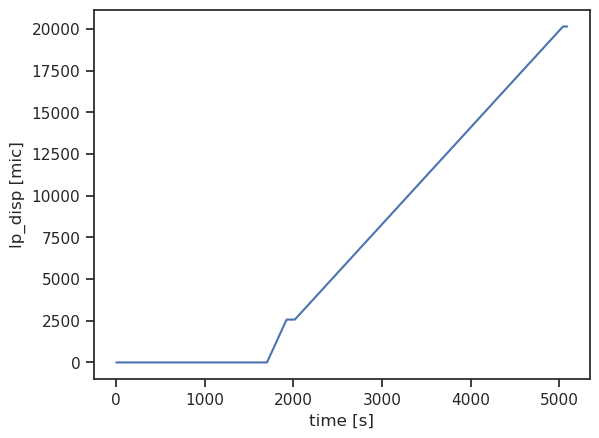

In [7]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="lp_disp")
plt.xlabel("time [s]")
plt.ylabel("lp_disp [mic]")
plt.show();

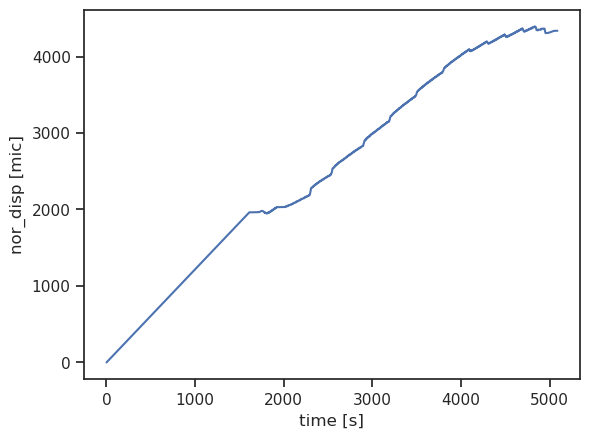

In [8]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="nor_disp")
plt.xlabel("time [s]")
plt.ylabel("nor_disp [mic]")
plt.show();

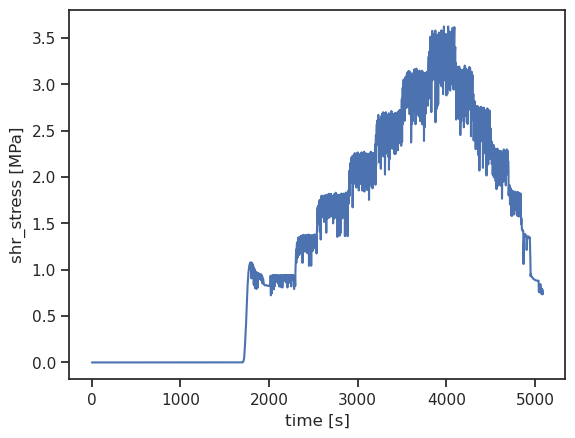

In [9]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="shr_stress")
plt.xlabel("time [s]")
plt.ylabel("shr_stress [MPa]")
plt.show();

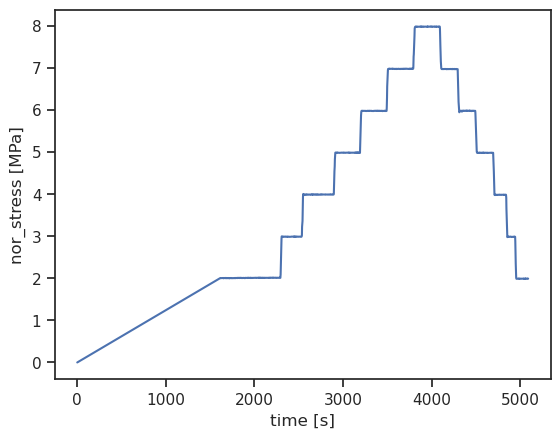

In [10]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="nor_stress")
plt.xlabel("time [s]")
plt.ylabel("nor_stress [MPa]")
plt.show();

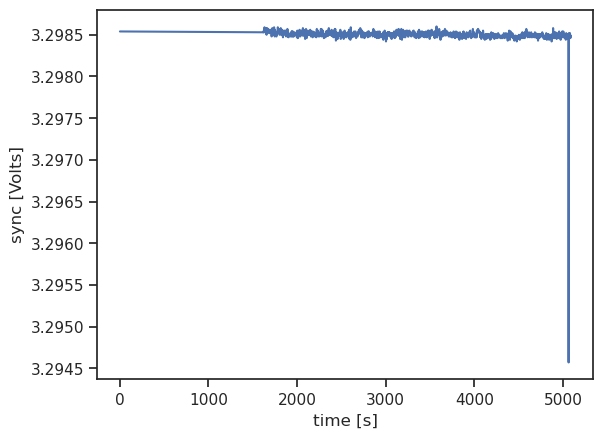

In [11]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="sync")
plt.xlabel("time [s]")
plt.ylabel("sync [Volts]")
plt.show();

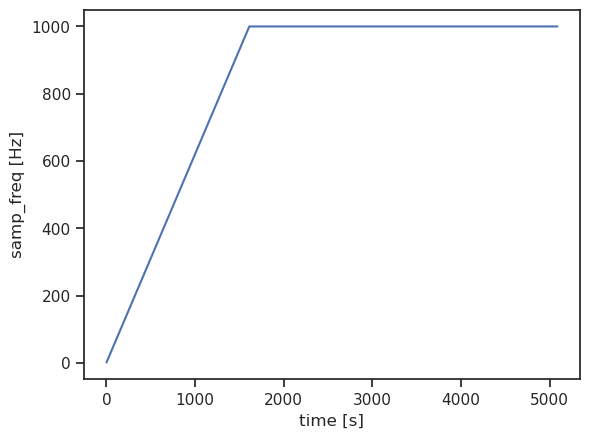

In [12]:
plt.figure()
sns.lineplot(data=subset_df, x="time", y="samp_freq")
plt.xlabel("time [s]")
plt.ylabel("samp_freq [Hz]")
plt.show();